<a href="https://colab.research.google.com/github/adbioc/Spectroscopy/blob/main/ori_cdxtract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/my_book/book_mypython/pcddb_pcd_and_gen/")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from scipy import sparse


18
2zxe
[2.80000e+02 2.33824e-03 2.65690e+00 2.33824e-03 0.00000e+00 0.00000e+00
 0.00000e+00]
101 7
['C', 'D', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '.', 'p', 'c', 'd']


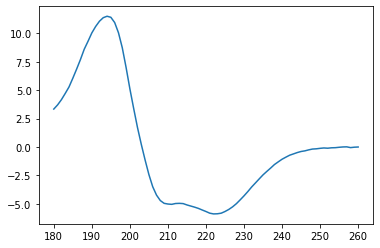

In [ ]:
# The function toskip determines how many entries should be skipped 

def toskip(fname):
  fo = open(fname)
  gcont=fo.readlines()
  n=[]
  z=[]
  for i in gcont:
    n.append(len(i))
  z=[float(i) for i in n]
  z=np.array(z)
  ik=np.where(z==max(z))[0]
  ik=ik+1
  return(gcont,ik[0])
## CHECK 
fname='CD0003993009.gen'

gcont,n=toskip(fname)
print(n)
#######################################################
# To skip 18 lines of the file - The one containing the author references has the maximum length

def findpdb(fname):
  gcont,n=toskip(fname)
  pcont=gcont[0:n]
  N=len(gcont)
  qcont=gcont[n:N]
  for i in range(n):
    s=pcont[i]
    ss=s.split()
    for j in ss:
      if (j=="PDB"):
        S=ss[1]
        break
  return(qcont,S)

# Check 

def findswiss(fname):
  gcont,n=toskip(fname)
  pcont=gcont[0:n]
  N=len(gcont)
  qcont=gcont[n:N]
  for i in range(n):
    s=pcont[i]
    ss=s.split()
    for j in ss:
      if (j=="Swissprot"):
        S=ss[1]
        break
  return(qcont,S)


qcont,S=findpdb(fname)
print(S)

################
def subclean(s):
  ss=s.split("\t")
  z=[]
  for i in s:
    ss=s.split("\t")
    sss=[s.strip('  ') for s in ss]
    sss.pop(-1)
    z=[float(i) for i in sss ]
    z=np.asarray(z)
    return  z
# CHECK 
qcont,S=findpdb('CD0003993009.gen')
s=qcont[0]
z=subclean(s)
print(z)
###########################
def find_row_col(fname):
  gcount,nskip=toskip(fname)
  nrow=len(gcount)-nskip
  T=gcount[nskip]
  ss=T.split("\t")
  sss=[s.strip('  ') for s in ss]
  sss.pop(-1)
  ncol=len(sss)
  return nrow,ncol
#CHECK    

r,c=find_row_col(fname)
print(r,c)
#########################

def CDclean(fname):
  r,c=find_row_col(fname)
  qcont,S=findpdb(fname)
  x = np.array(np.zeros((r,c), dtype = np.float)).reshape(r,c)
  for i in range(r):
    s=subclean(qcont[i])
    x[i,:]=s
  #plt.plot(x[:,0],x[:,3])
  #plt.show()
  return x
##Chk
X=CDclean('CD0001109007.gen')
plt.plot(X[:,0],X[:,3])
def mysplit(word): 
    return [alphabet for alphabet in word]  
      
# Driver code 
word = 'geeks'
print(mysplit('CD0000110000.pcd')) 





```
# This is formatted as code
```

- Running fine 
- Now let us try a different thing 
- Try to find out PCDDB entries for uniprot accession number Q70Q12 (PDB ID 2zxe )

In [ ]:
def mysplit(word): 
    return [alphabet for alphabet in word]  
      
# Driver code 
word = 'geeks'
W=mysplit('CD0000110000.pcd') 
print(W[0])
s = ""
s = s.join(W) 
s

C


'CD0000110000.pcd'

### Find out whether the file starts with 	CD000118 and ends with GEN

# Strategy if finding out the filename start with CD000118  and it ends with .GEN


# Each of these have the Protein Name: Sodium/potassium-transporting ATPase with uniprot accession number Q70Q12

We may checkthe PDB IDs of the CD spectra files as follows:

In [ ]:
def CDstring(single_entry):
  ff=[]
  a=os.listdir()# Assume current directory contains CDspectra files
  x=single_entry[0:7]
  for i in a:
    fbegin=i[0:7]# the file name fraction to be compared with the single entry
    fend=i[13:16]# .gen files 
    A= fbegin==x
    B=fend=="gen"
    if (A&B):
      ff.append(i)
  return ff
####################################
# chk

single_entry='CD0001109000.gen'
ff=CDstring(single_entry)
ff


In [ ]:

# What is the SWISSPROT or PDBID of this ?
q,swiss=findswiss(single_entry)
swiss


'Q9KCR8'

In [ ]:
# Answer is Q9KCR8
# How do we find out that out of the ff entries how many have the identical 

####################################
def swisscut(CDfilter1,desiredID):
  gg=[]
  for i in CDfilter1:
    q,n=toskip(i)
    a,b=findswiss(i)
    if (b==desiredID):
      gg.append(i)
  return gg
#####################################
#chk
gg=swisscut(ff,'Q9KCR8')
gg

# #Chk2



# What we find is that still there is an isosbestic point. This isosbsetic is unique as this is caused in the organismic space

# How to enlist the PCDDB entries for a particular type of protein 
- Try with a search string in PCDDB data base for Ca2+ variation in Calcium channel protein) 
-  CDstring(single_entry) , single entry can be a file like CD0001109000.gen
- Filtering out entries with non-identical SWISSPROT aceesion numbers (PDB amy not be avalilabe for each) from the entry set obtained by the said search string 
- Once the files are obtained they are sorted by Tempeerature 


- Now  we have a set of files for the Voltage-activated, Ca2+  channel blocker-inhibited, Na+ channel, NaChBac (Ren et al., 2001; Zhao et al., 2004; Nurani et al, 2008; Charalambous and Wallace, 2011).
- The temperature range is $20-85^oC$
 Arginine residues in the S4 segment play a role in voltage-sensing (Chahine et al. 2004). Transmembrane and extramembrane regions contribute to thermal stability (Powl et al., 2012). Deprotonation of arginines in S4 is involved in NaChBac gating (Paldi, 2012). Hinge-bending motions in the pore domain of NaChBac have been reported (Barber et al., 2012).  The C-terminal coiled-coli stabilizes subunit interactions (Mio et al. 2010).  Within the 4 TMS voltage sensor, coupling between residues in S1 and S4 determines its resting conformation (Paldi and Gurevitz 2010). The conserved asparagine was changed to aspartate, N225D, and this substitution shifted the voltage-dependence of inactivation by 25 mV to more hyperpolarized potentials. The mutant also displays greater thermostability (O'Reilly et al. 2017).  Possibly, the side-chain amido group of asn225 forms one or more hydrogen bonds with different channel elements, and  these interactions are important for normal channel function.
Accession Number:	Q9KCR8

In [ ]:
#Assume a os listing of the directories containing the CD file 




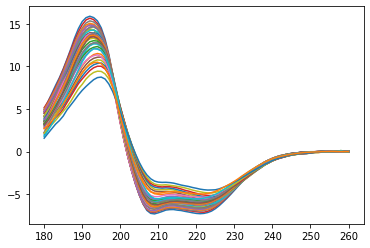

In [ ]:
# Find Temperature  sorted file entries 

def CD2Temp(CDfilter2):
  TT=[]
  for i in CDfilter2:
    q,n=toskip(i)
    TT.append(q[4][23:-1])
    a,b=findswiss(i)
    T = [float(i) for i in TT] 
  T=np.array(T)
  indx=np.argsort(T)
  Tsorted=T[indx]
  C=np.array(CDfilter2)
  return Tsorted,indx,C[indx]


# Chk
T,ij,C=CD2Temp(gg)
# Chk for CDspecrum 

for i in range(ij.shape[0]):
  X=CDclean(C[i])
  plt.plot(X[:,0],X[:,3])





In [ ]:
#df = pd.Dataframe(npArray)
#df.assign('newcolumn', yourNewColumnValuesAsList)

# df=pd.DataFrame()
# df.assign(str(T[0]),CDclean(C[0])
T,ij,C=CD2Temp(gg)
lam=CDclean(C[0])[:,0]

##########################

CD_dict = { 'Lambda':lam}
count=0
for i in T:
  count=count+1
  CD_dict[i]=CDclean(C[count-1])[:,3]
  if (count >=41):
    break
  
list(CD_dict.keys())
#X=list(CD_dict.values())
s=pd.DataFrame.from_dict(CD_dict)
df.to_csv('calcium_chan.csv')



In [ ]:
!ls *.csv 
s


calcium_chan.csv


,Lambda,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,60.0,65.0,70.0,75.0,80.0,85.0
0,260.0,-0.008695,0.026866,-0.036749,0.065283,0.005938,0.029302,-0.009281,0.012199,-0.031914,0.014119,0.034883,0.011028,-0.001857,0.019028
1,259.0,0.012656,-0.020313,0.016695,-0.018643,0.005226,-0.001876,0.008738,-0.024041,-0.003308,0.036272,0.004574,-0.004852,-0.007070,0.009657
2,258.0,0.040183,0.015257,0.070037,-0.030951,0.070071,-0.017390,0.055870,0.073787,0.056243,0.009635,-0.021946,0.005836,0.007501,-0.023391
3,257.0,0.008368,0.002449,0.011241,-0.009899,-0.000184,-0.009490,0.005112,0.002770,0.016877,-0.005143,-0.010837,-0.002109,0.007892,0.002900
4,256.0,-0.016040,-0.004831,0.002254,-0.020701,-0.005890,-0.011035,0.003139,0.001001,0.011443,-0.008901,-0.015153,0.006171,0.001471,-0.008821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,184.0,7.881380,7.807890,7.853370,8.220770,7.449730,7.689470,7.108810,7.175020,7.155910,6.134880,6.131710,6.082090,4.187960,3.635190
77,183.0,6.980140,6.845820,6.726530,7.285450,6.470080,6.775450,6.151320,6.279050,6.157830,5.414280,5.305690,5.114360,3.654730,3.218380
78,182.0,6.131860,6.030890,5.750540,6.429090,5.495620,5.874860,5.305200,5.299670,5.181000,4.637620,4.564580,4.340910,3.163620,2.679930
79,181.0,5.357840,5.312560,4.835790,5.627160,4.518450,4.993780,4.542200,4.267350,4.183910,3.873330,3.873830,3.672480,2.664320,2.130750
